## import python library

In [1]:
import importlib
import utils.helper as helper
importlib.reload(helper)
from utils.helper import read_excel
from utils.helper import draw_hex_contour_plot, show_joint_plots, draw_heatmap
import matplotlib.pyplot as plt


### load data and set up hyper-parameters
1. label means the feature we want to predict
2. colors must match the number of input features, otherwise, we will use the default color: #4CB391

In [2]:
excel_file_path = "./Data_Collection_V3.xlsx"
sheet_page = "Sheet1"
label = "Compressive Strength (Mpa)"
# if the number of color is not 12, will use default color "#4CB391"
colors = ["#4CB391"]
save_paths = []

read the data from excel

In [3]:
df = read_excel(excel_file_path, sheet_page)
column_names = list(df.columns)
print(column_names)

['Data', 'Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


each sub figures will be saved in the results folder. We will load all the subfigures and put them into a 4*3 grid

In [6]:
# each figure will be save in the results folder
for idx, feature in enumerate(column_names[1:13]):
    if idx >= len(colors):
        color = "#4CB391"
    else:
        color = colors[idx]
    sp = draw_hex_contour_plot(df, feature, label, color)
    save_paths.append(sp)

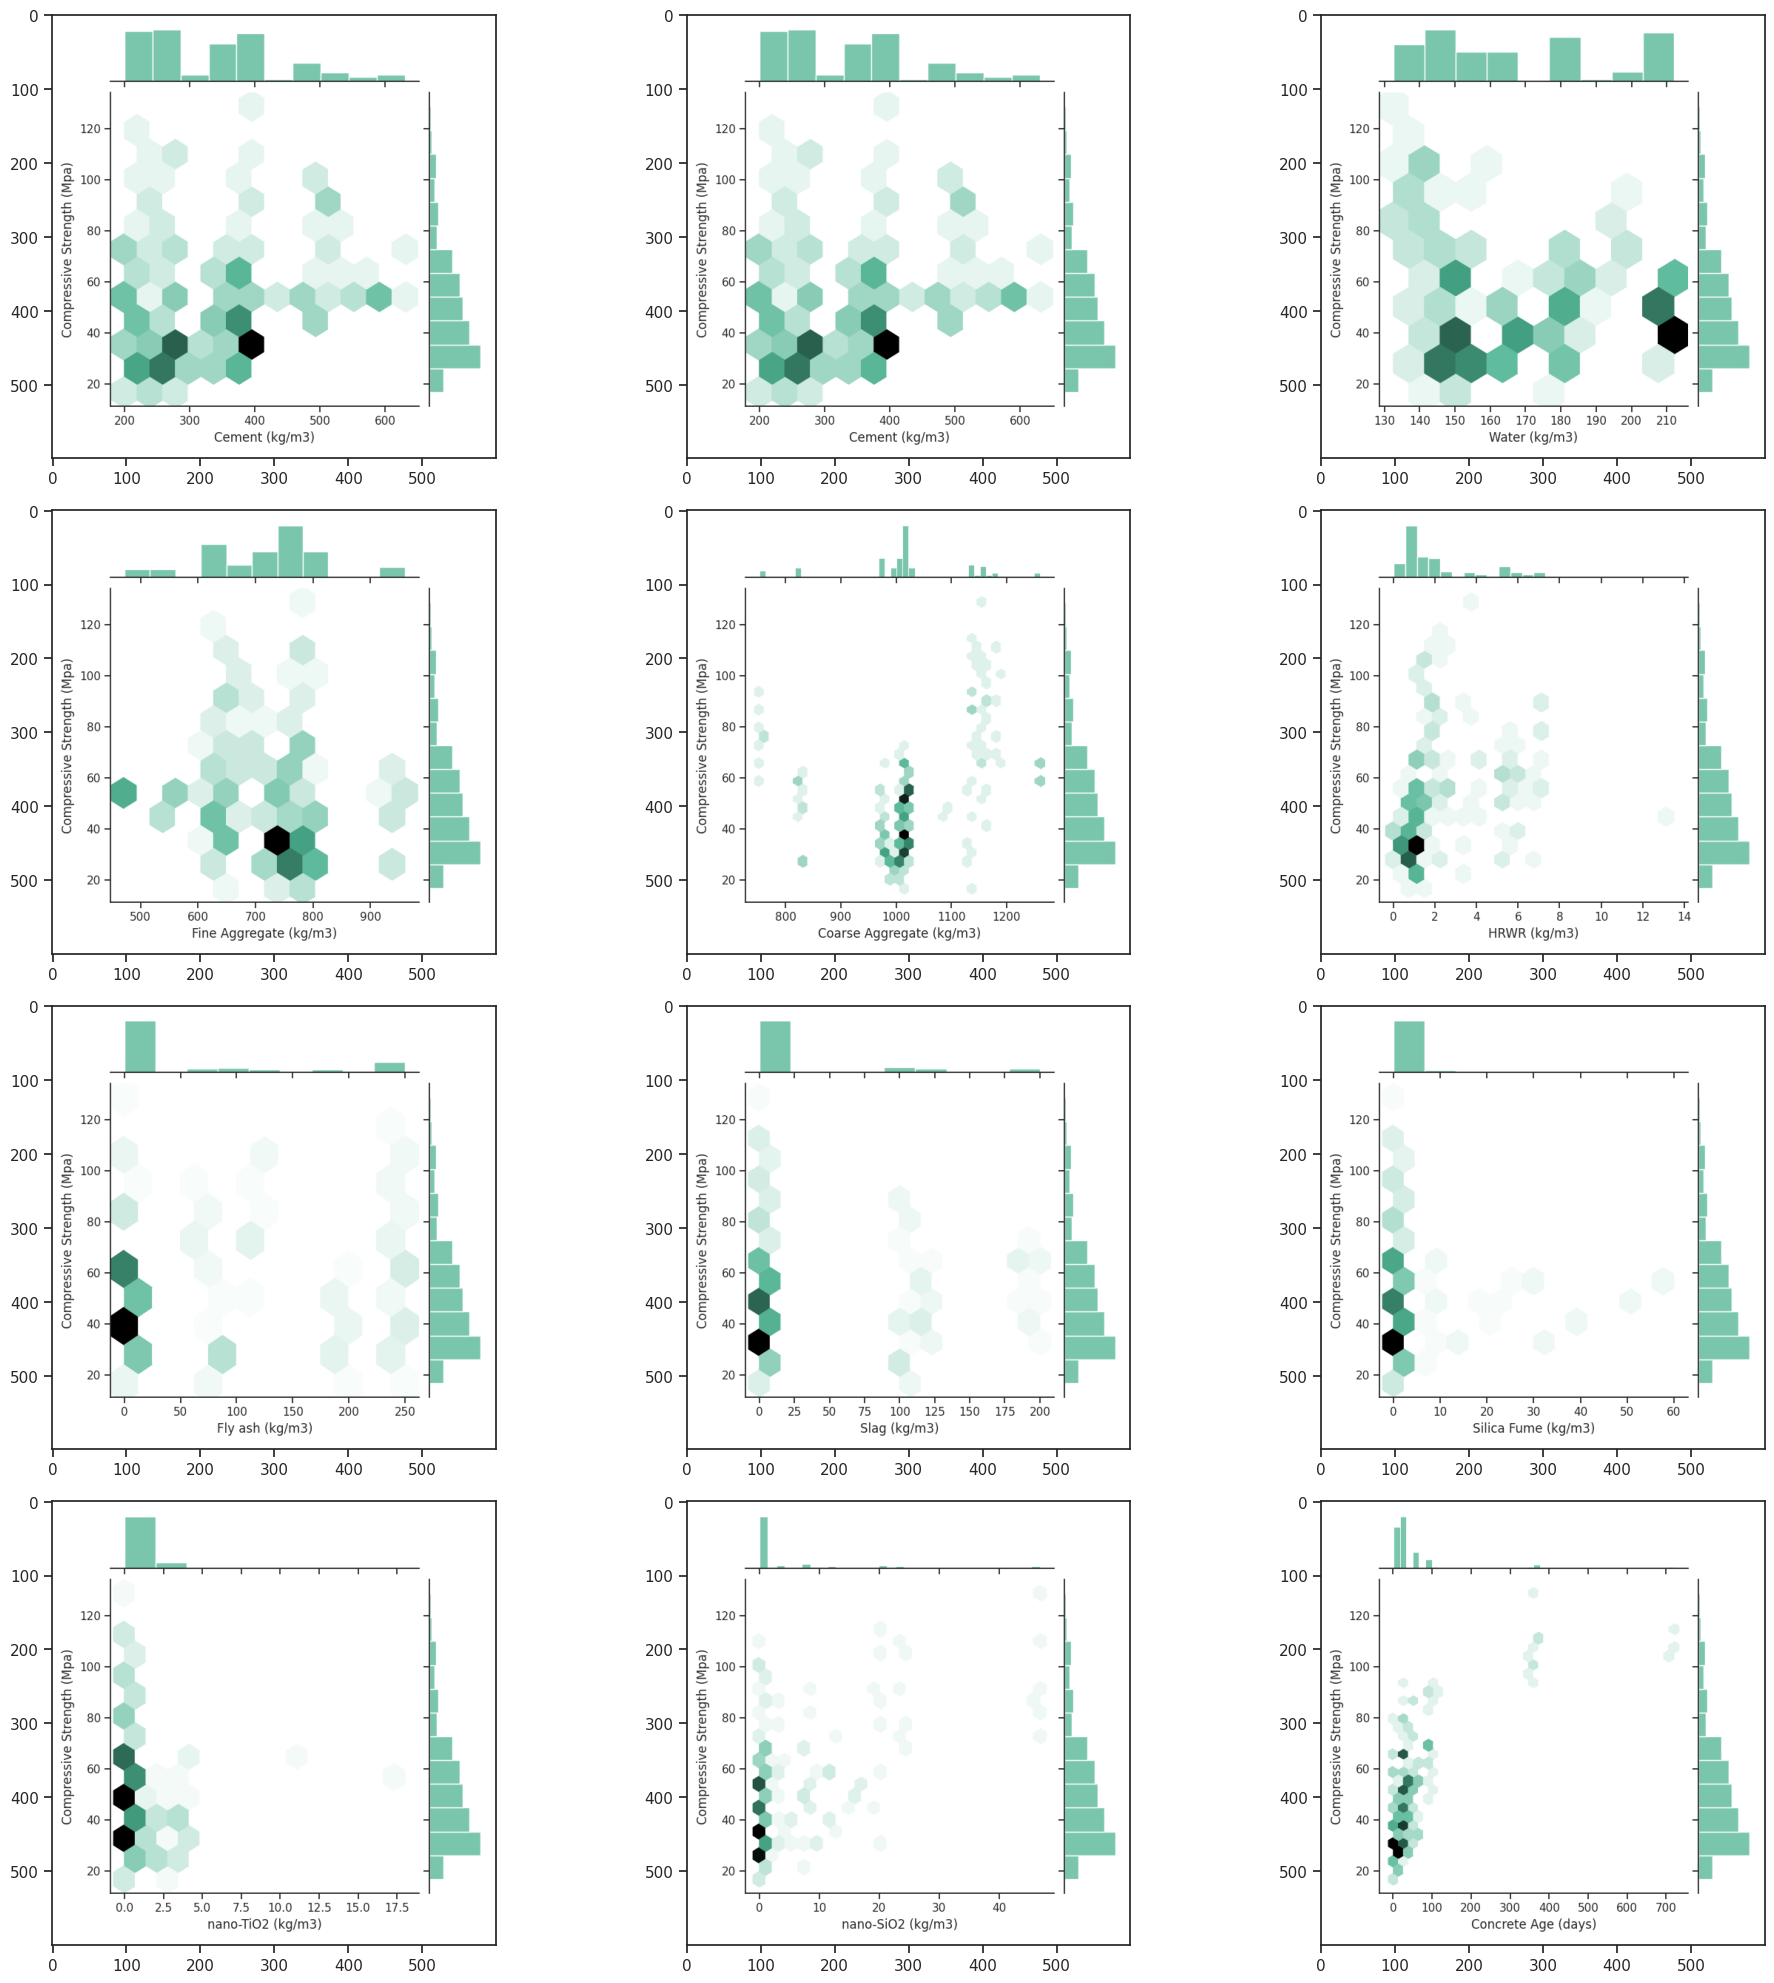

<Figure size 640x480 with 0 Axes>

In [7]:

row = 4
col= 3
count = 0
fig, axs = plt.subplots(row,col, figsize=(20,20))
for i in range(row):
    for j in range(col):
        show_joint_plots(save_paths[count], axs[i][j])
        count += 1
plt.tight_layout()
plt.show()
plt.savefig("./contour_vex.png")